In [1]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432


In [2]:
import psycopg2
import pandas as pd
import seaborn as sns
import plotly as plt
from matplotlib import pyplot as plt
import plotly.express as px


In [3]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

#### 3.1 Определяю кол-во вакансий.

In [4]:
query = f'''SELECT COUNT(id)
            FROM vacancies
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_20220\34693283.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count
0,49197


#### 3.2 Определяю кол-во работодателей.

In [5]:
query = f'''SELECT COUNT(DISTINCT id)
            FROM employers
           
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_20220\2887869977.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count
0,23501


#### 3.3 Определяю кол-во регионов.

In [25]:
query = f'''SELECT COUNT(DISTINCT id)
            FROM areas
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_12008\1548808672.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count
0,1362


#### 3.4 Определяю кол-во сфер деятельности.

In [4]:
query = '''SELECT COUNT(DISTINCT id)
            FROM industries
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\928691129.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count
0,294


#### Топ 10 самых популярных вакансий.

In [26]:
query = '''SELECT
               COUNT(name),
               name
            FROM vacancies 
            GROUP BY name
            ORDER BY COUNT(name) DESC
            LIMIT 10
        '''
        
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_19784\2323295121.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count,name
0,1761,Системный администратор
1,1153,Программист 1С
2,488,Бизнес-аналитик
3,457,Специалист технической поддержки
4,432,Системный аналитик
5,404,Аналитик
6,389,Инженер-программист
7,360,Программист 1C
8,242,Frontend-разработчик
9,230,Инженер технической поддержки


-----------------
#### Выводы по первому блоку заданий.
* В целом, суммарное количетсво вакансий не так велико, учиывая то, что они собраны не только на территории России, но и с ближайших стран.
* Можно заметить, что работодателей примерно в два раза меньше, чем вакансий, что говорит о том, что в среднем на каждого работодателя приходится по две вакансии.
* Большое кол-во регионов, может говорить об открытых вакансиях во многих местах.
* Количество сфер деятельности указанных в вакансиях, выглядит не очень большим, но достаточным, чтобы дать понять, что сферы деятельности весьма разнообразны.

---------------

#### 4.1 Определяю сколько вакансий в кадом регионе и пятёрку лидеров.

C:\Users\dasad\AppData\Local\Temp\ipykernel_11708\1662414647.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


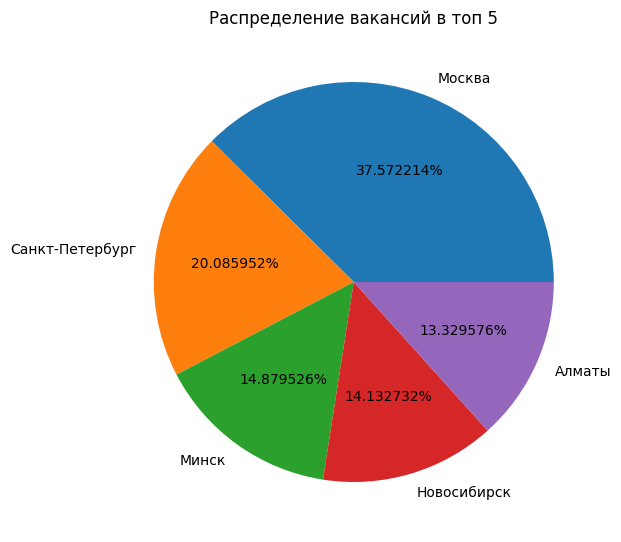

In [18]:

query = f'''select 
                a.name name_city,
                COUNT(v.id)
            FROM vacancies v 
            JOIN areas a ON v.area_id = a.id
            GROUP BY a.name
            ORDER BY count(v.id) desc
            LIMIT 5
        '''
df = pd.read_sql(query, connection)
df
fig = plt.figure( figsize =(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    df['count'],
    labels=df['name_city'],
    autopct='%1f%%'
)
axes.set_title('Распределение вакансий в топ 5')
plt.show()

#### 4.2 Определяю у какого кол-ва вакансий заполнено хотя бы одно поля о нижней или верхней границе зарплаты.

In [9]:
query = f'''SELECT 
                salary_from upper_bound, 
                salary_to lower_bound
            FROM vacancies v 
            WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL  
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\169100744.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,upper_bound,lower_bound
0,64000.0,NaN
1,15000.0,NaN
2,40000.0,60000.0
3,50000.0,NaN
4,150000.0,NaN
...,...,...
24068,50000.0,NaN
24069,102500.0,NaN
24070,40000.0,78000.0
24071,60000.0,NaN


#### 4.2* Определяю, какую границу зарплаты указывают чаще. (дополнительно)

In [30]:
query = ''' SELECT
                COUNT(v.salary_to) count_lower_bound,
                COUNT(v.salary_from) count_upper_bound
            FROM vacancies v
            WHERE v.salary_from IS NULL OR v.salary_to IS NULL 
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_11708\1723030994.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_lower_bound,count_upper_bound
0,2588,11383


#### 4.3 Определяю среднее значение для нижней и верхней границы зарплаты с округлением до целого числа.

In [8]:
query = f'''SELECT
                ROUND(AVG(v.salary_from),0) lower_bound,
                ROUND(AVG(v.salary_to),0) upper_bound
            FROM vacancies v
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\1380298578.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,lower_bound,upper_bound
0,71065.0,110537.0


#### 4.4 Определяю какое сочетание типа рабочего графика и типа трудоустройства самое популярное.

C:\Users\dasad\AppData\Local\Temp\ipykernel_11708\4000681153.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
c:\Users\dasad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dasad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dasad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_cate

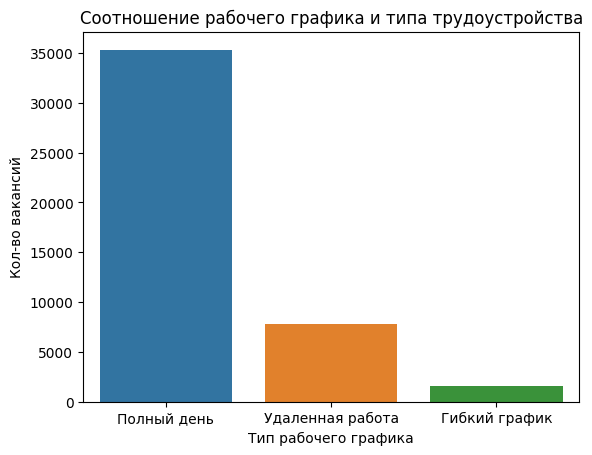

In [19]:
query = f'''SELECT
                COUNT(*),
                schedule,
                employment
            FROM vacancies
            GROUP BY schedule, employment
            ORDER BY COUNT(*) DESC
            LIMIT 3
        '''
df = pd.read_sql(query, connection)
df_1 = df.copy()
ax = sns.barplot(df_1, x ='schedule', y='count')
ax.set_title('Соотношение рабочего графика и типа трудоустройства')
ax.set_xlabel('Тип рабочего графика')
ax.set_ylabel('Кол-во вакансий')
plt.show()

#### 4.4* Определяю какое сочетание типа рабочего графика и типа трудоустройства самое популярное (дополнительное).

In [19]:
query = f'''SELECT
                COUNT(*),
                AVG(salary_from) avg_upper_bound,
                AVG(salary_to) avg_lower_bound,
                schedule type_work,
                employment type_of_emp
            FROM vacancies
            GROUP BY schedule, employment
            HAVING COUNT(*) > 200
            ORDER BY avg_upper_bound, avg_lower_bound
            
        '''
df = pd.read_sql(query, connection)
df


C:\Users\dasad\AppData\Local\Temp\ipykernel_19784\3297782384.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count,avg_upper_bound,avg_lower_bound,type_work,type_of_emp
0,1312,22499.802235,81262.356522,Удаленная работа,Частичная занятость
1,569,29545.661088,48637.397590,Полный день,Стажировка
2,312,37350.833333,55199.260000,Гибкий график,Частичная занятость
3,347,39506.943503,69030.953704,Полный день,Частичная занятость
4,940,43501.966361,51023.082822,Сменный график,Полная занятость
5,35367,69165.132002,101676.482475,Полный день,Полная занятость
6,1593,94724.889643,156356.814536,Гибкий график,Полная занятость
7,7802,100651.860999,157313.758904,Удаленная работа,Полная занятость
8,367,106952.864583,139903.900000,Вахтовый метод,Полная занятость


#### 4.5 Распределение кол-ва вакансий по типу занятости в порядке возрастания.

C:\Users\dasad\AppData\Local\Temp\ipykernel_11708\1867814562.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


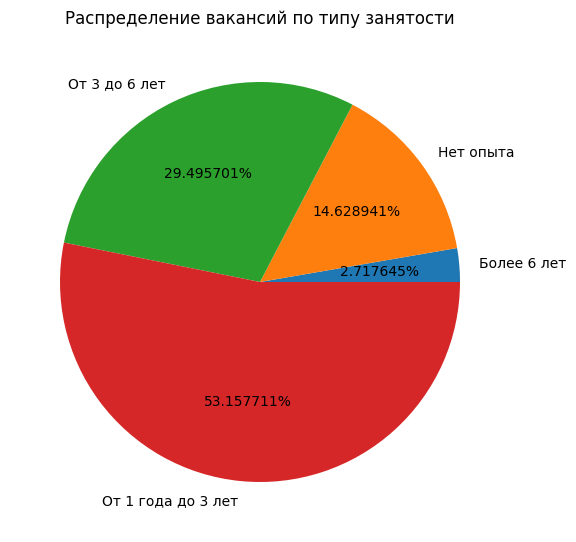

In [28]:
query = f'''SELECT 
                COUNT(*),
                experience
            FROM vacancies 
            GROUP BY experience
            ORDER BY COUNT(*) ASC
        '''
df = pd.read_sql(query, connection)
df
fig = plt.figure( figsize =(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    df['count'],
    labels=df['experience'],
    autopct='%1f%%'   
)
axes.set_title('Распределение вакансий по типу занятости')
plt.show()          

------------------------
#### Выводы по второму блоку заданий.
* Можно отметить, что самая большая концентрация вакансий в крупных городах (столицах), естественно, что это связано с тем, что в городах больше людей и компаний.
* Люди намного чаще отмечают нижнюю границу зарплаты, нежели верхнюю. Возможно связано с тем, что люди не хотят отпугивать вероятного работодателя слишком высокой желаемой зарплатой, т.к. он может в итоге отказаться в пользу более "скромного" кандидата. Возможно, люди не имеют полного представления о том, какую максимальную зарплату можно указывать в их случае.
* Разница между средним увронем нижней границы и верхней границы составлят примено 40'000, что тоже говорит о том, что люди называют зарплату сущесвтенно скромнее.
* Можно уверенно, сказать, что большее кол-во вакансий связано с "полным рабочим днём", примерно в три раза ниже "удаённая работа" и совсем немного с гибким графиком. Возможно связано с тем, что полный рабочий день выше оплачивается.
* Но, стоит отметить, что исходя из графика 4.4* "удалённая работа" с "полной зантяостью" в среднем оплачивается выше. Ниже всех оплаичвается "гибкий график" - "частичная занятость".
* Из графика 4.5 можно сдлеать несколько выводов:
   1. Больше всего вакансий с опытом работы от 1 до 3 лет, около 53%. Возможно это связано с тем, что таких кандидатов довольно много и человек уже обладает минимальным опытом работы для более менее эффективной работы. 
   2. Примерно в два раза меньше вакансий с опытом работы от 3-6 лет, окло 29%. Это может быть связано с тем, что многие сотрудники остаются на рабочем месте и делают карьеру и не стремяться менять место.
   3. Меньше всего вакансий с опытом работы от 6 лет, около 2.7%. Это может быть связано с тем, что сотрудники с таким опытом работы меняют место не часто, продолжая движение по карьерной лестнице в итоге они начинают занимать высокие должности и не стремяться менять место.
   4. Вакансий, которые ищут сотрудников без опыта 14.5%. Помимо того, что это может быть связано с тем, что какие-то компании готовы брать на работу сотрудников без опыта, но также и с тем, что многие виды деятельности не требуют никакого опыта, в какой бы момент не захотел делать данную рабоут(уборщик, официано и т.д.)

---------------------


#### 5.1 Определяю какие работодатели в первой пятёрке по количеству вакансий (интересует первое и пятое место).

C:\Users\dasad\AppData\Local\Temp\ipykernel_19784\1462487746.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


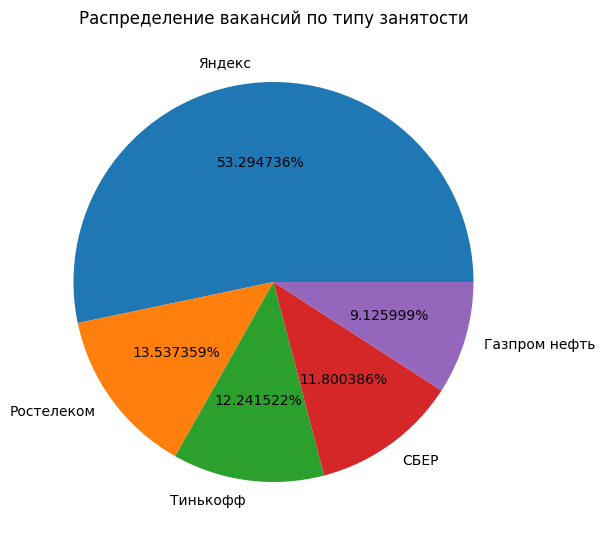

In [20]:
query = f'''SELECT
                COUNT(*),
                e.name
            FROM vacancies v
            JOIN employers e ON v.employer_id = e.id
            GROUP BY e.name
            ORDER BY COUNT(*) DESC
            LIMIT 5
         '''
df = pd.read_sql(query,connection)
df
fig = plt.figure( figsize =(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    df['count'],
    labels=df['name'],
    autopct='%1f%%'   
)
axes.set_title('Распределение вакансий по типу занятости')
plt.show() 

#### 5.2 Запрос, который для каждого региона выведет кол-во вакансий и кол-во работодателей. 
##### Необходимо определить регион в котором нет вакансий, но при этом самое большое кол-во работодателей.

In [14]:
query = f'''select 
                a.name,
                COUNT(distinct e.id) count_emp,
                COUNT(distinct v.id) count_vac
            FROM areas a
            LEFT JOIN employers e ON a.id = e.area
            LEFT JOIN vacancies v ON v.area_id = a.id
            WHERE v.id IS NULL
            GROUP BY a.id
            ORDER BY count_emp DESC  
            LIMIT 1  
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\267207674.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,name,count_emp,count_vac
0,Россия,410,0


#### 5.3 Расчёт для каждого работодателя кол-ва регионов, где он публикует свои вакансии.

In [15]:
query = f'''SELECT
                COUNT(DISTINCT area_id) count_areas,
                employer_id
            FROM vacancies
            GROUP BY employer_id
            ORDER BY COUNT(area_id) DESC
            LIMIT 1
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\3923480570.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_areas,employer_id
0,181,1740


#### 5.4 Подсчёт работодателей у которых не указана сфера дефтельности.

In [37]:
query = f'''SELECT
                COUNT(e.id)
            FROM employers e
            LEFT JOIN employers_industries ei ON e.id = ei.employer_id
            WHERE ei.industry_id IS NULL
            '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_12008\1336012139.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count
0,8419


#### 5.5 Определяю название компании, находящиеся на третьем месте по алфавитной сортировке у которой указано четыре сферы деятельности.

In [16]:
query = f'''SELECT
                e.name name_employment,
                COUNT(ei.industry_id) count_indusrties
            FROM employers e
            LEFT JOIN employers_industries ei ON e.id = ei.employer_id
            GROUP BY e.name
            HAVING COUNT(ei.industry_id) = 4
            ORDER BY e.name ASC   
            OFFSET 2
            LIMIT 1 
         '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\3254038397.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,name_employment,count_indusrties
0,2ГИС,4


#### 5.6 Определяю у какого кол-ва компаний указана сфера деятельности "Разработка программного обеспечения".


In [17]:
query = f'''SELECT
                COUNT(DISTINCT e.id) количество_работодателей,
                i.name название_сферы_деятельности
            FROM employers_industries ei
            JOIN employers e ON ei.employer_id = e.id
            JOIN industries i ON ei.industry_id = i.id
            GROUP BY i.name
            HAVING i.name = 'Разработка программного обеспечения'
         '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\526981163.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,количество_работодателей,название_сферы_деятельности
0,3553,Разработка программного обеспечения


#### 5.7 Определяю в каких регионах "Яндекс" разместил объявления и сколько.

In [18]:
citys = ( 'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 
        'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
query = f'''WITH RegionVacancies AS
                (SELECT
                    a.name region,
                    COUNT(v.id) count_vac
                FROM vacancies v
                JOIN employers e ON e.id = v.employer_id
                JOIN areas a ON v.area_id = a.id
                WHERE e.name = 'Яндекс' AND a.name in {citys}
                GROUP BY a.name
                
            )
            
            SELECT
                r.region,
                r.count_vac
            FROM RegionVacancies r
             
            UNION ALL
            
            SELECT 
                'Total' region,
                SUM(count_vac) total_vac
            FROM RegionVacancies   
            '''
df = pd.read_sql(query, connection)
df            


C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\1981025628.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,region,count_vac
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


----------------------------
#### Выводы по третьему блоку заданий.
* Самое большое кол-во вакансий у Яндекса. Вероятно это связано с тем, что компания довольно долго на рынке и весьма успешная. Яндекс постоянно развивается и расширяется, а это требует поиска новых сотрудников. Так же у Янедкса вакансии распределны во многих регионах, что говорит о том, что компания может набирать сотрудников на удалённую работу, а также наличие в некоторых других городах офисов, что опять же повышает у соискателей интерес к этой компании.
* Следом идёт Ростелеком, который занимается телекоммуникациями, что так же может сказать о том, что эта компания занимает на данный момент лидирующую позицию.
* Далее идут крупнейшие банки России и нефтегазовае компании.
------------------------------

#### 6.1 Определяю, сколько вакансий имеет отношение к данным (содержат слова 'data', 'данн').

In [19]:
query = ''' SELECT 
                COUNT(*) count_vac
            FROM vacancies v
            WHERE LOWER(v.name) LIKE '%data%' OR LOWER(v.name) LIKE '%данн%'
         '''
         
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\310937855.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_vac
0,1771


#### 6.2 Определяю сколько вакансий подходят для начинающего DS и содержат ключевые слова 'junior' или 'нет опыта', или 'стажировка'.

In [23]:
#filter_list = ('data scientist', 'data science', 'исследователь данных', 'ML', 'machine learning', 'машинн%обучен%')
query = ''' SELECT 
                COUNT(*) count_vac
            FROM vacancies v
            WHERE ((v.name ILIKE '%data scientist%'
                OR v.name ILIKE '%data science%'
                OR v.name ILIKE '%исследователь данных%')
                OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
                OR v.name ILIKE '%machine learning%'
                OR v.name ILIKE '%машинн%обучен%'
                AND v.key_skills IS NOT NULL)  
            AND (v.name ILIKE '%junior%' 
                OR v.experience ILIKE '%нет опыта%'
                OR v.employment ILIKE '%стажировка%')            
        ''' 
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\4206567296.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_vac
0,51


#### 6.3 Определяю сколько вакансий содержат ключевый навыки 'postgres' и 'SQL'.

In [22]:
query = ''' SELECT 
                COUNT(v.name) count_filter
            FROM vacancies v
            WHERE (v.name ILIKE '%data scientist%'
                OR v.name ILIKE '%data science%'
                OR v.name ILIKE '%исследователь данных%'
                OR (v.name LIKE '%ML%' AND v.name NOT iLIKE '%HTML%')
                OR v.name ILIKE '%machine learning%'
                OR v.name ILIKE '%машинн%обучен%'
                AND v.key_skills IS NOT NULL)  
            AND (v.key_skills ILIKE '%sql%'
                OR v.key_skills ILIKE '%postgre%')          
        ''' 
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\1692347994.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_filter
0,201


#### 6.4 Определяю на сколько часто встречается в ключевых навыках 'python'.

In [20]:
query = ''' SELECT 
                COUNT(v.name) count_key
            FROM vacancies v
            WHERE ((v.name ILIKE '%data scientist%'
                OR v.name ILIKE '%data science%'
                OR v.name ILIKE '%исследователь данных%')
                OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
                OR v.name ILIKE '%machine learning%'
                OR v.name ILIKE '%машинн%обучен%'
                AND v.key_skills IS NOT NULL) 
            AND (v.key_skills ILIKE '%python%')
                
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\1956259922.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_key
0,351


#### 6.5 Определяю сколько ключевых навыков в среднем указывают в вакансиях для DS.

In [21]:
query = ''' SELECT 
                ROUND(AVG(CAST(cardinality(REGEXP_SPLIT_TO_ARRAY(v.key_skills, '\t')) AS NUMERIC)),2) count_key_skills
            FROM vacancies v
            WHERE ((v.name ILIKE '%data scientist%'
                OR v.name ILIKE '%data science%'
                OR v.name ILIKE '%исследователь данных%')
                OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
                OR v.name ILIKE '%machine learning%'
                OR v.name ILIKE '%машинн%обучен%')
                AND (v.key_skills IS NOT NULL) 
        '''
df = pd.read_sql(query, connection)
df

C:\Users\dasad\AppData\Local\Temp\ipykernel_16112\3632378579.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,count_key_skills
0,6.41


#### 6.6 Какая зарплата в среднем указывается для DS для каждого требуемого опыта.

C:\Users\dasad\AppData\Local\Temp\ipykernel_19784\2908391099.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
c:\Users\dasad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dasad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dasad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_cate

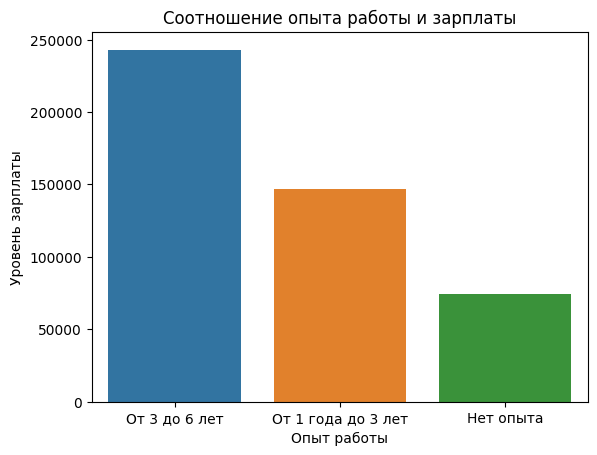

In [23]:
query = '''WITH zp AS(SELECT
                v.experience,
                v.salary_from,
                v.salary_to     
            FROM vacancies v
            WHERE ((v.name ILIKE '%data scientist%'
                OR v.name ILIKE '%data science%'
                OR v.name ILIKE '%исследователь данных%')
                OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
                OR v.name ILIKE '%machine learning%'
                OR v.name ILIKE '%машинн%обучен%')
                AND (v.key_skills IS NOT NULL)
                AND(v.salary_from IS NOT NULL 
                OR v.salary_to IS NOT NULL) 
            )
        SELECT 
            experience,
            ROUND(AVG(coalesce((salary_from + salary_to)/2, salary_from, salary_to)),0) AS average_salary
        FROM zp
        GROUP BY experience   
        '''
df = pd.read_sql(query, connection)
df
ax = sns.barplot(df, x ='experience', y='average_salary')
ax.set_title('Соотношение опыта работы и зарплаты')
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Уровень зарплаты')
plt.show()


----------------------------
#### Выводы по третьему блоку заданий.
* Исходя из результатов, можно сказать, что вакансий на DS не так много, особенно для новичков у которых нет опыта, что говорит о том, что рынок на данный момент перенасыщен и конкуренция возросла.
* Очевидно, что чем больше опыта работы, тем выше зарплата.
------------------------


------------------------------
-------------------------------
## Основной вывод
* Больше всего вакансий имеют отношение к IT-сфере.
* Основная концентрация вакансий - это столицы регионов и столицы ближайших к России стран.
* Основная масса вакансий сосредоточена у крупных компаний, которые в своих отрослях занимают лидирующие позиции.
* Анализ средних показателей зарплат показал, что они не такие высокие в сравнении с некоторыми другими странами.
* В целом, количество вакансий не высокое, учитывая, что hh.ru один из самых популярных сервисов в России, Белоруссии, Казахстане.

------------------------
----------------------

In [55]:
connection.close()